In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df['Species'] =data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
x=df.drop('Species',axis=1)
y=df['Species']

In [15]:
x_train,x_test,y_train,y_test=x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [17]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
from keras.utils import np_utils

In [19]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)

In [20]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [21]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trai

In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 13s 447ms/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.0974 - val_accuracy: 0.3778
Epoch 2/10
6/6 [==============================] - 0s 84ms/step - loss: 1.0966 - accuracy: 0.4476 - val_loss: 1.0980 - val_accuracy: 0.4000
Epoch 3/10
6/6 [==============================] - 0s 89ms/step - loss: 1.0951 - accuracy: 0.4190 - val_loss: 1.0944 - val_accuracy: 0.6222
Epoch 4/10
6/6 [==============================] - 1s 89ms/step - loss: 1.0923 - accuracy: 0.4952 - val_loss: 1.0904 - val_accuracy: 0.3333
Epoch 5/10
6/6 [==============================] - 0s 89ms/step - loss: 1.0855 - accuracy: 0.4476 - val_loss: 1.0823 - val_accuracy: 0.6222
Epoch 6/10
6/6 [==============================] - 1s 93ms/step - loss: 1.0774 - accuracy: 0.6381 - val_loss: 1.0711 - val_accuracy: 0.6222
Epoch 7/10
6/6 [==============================] - 0s 85ms/step - loss: 1.0620 - accuracy: 0.5143 - val_loss: 1.0512 - val_accuracy: 0.6222
Epoch 8/10
6/6 [=========

In [25]:
predictions = model.predict(x_test)
print(predictions)

2/2 [==============================] - 1s 20ms/step
[[0.24744543 0.32554772 0.4270068 ]
 [0.20218897 0.32696038 0.4708506 ]
 [0.4818472  0.26461217 0.25354064]
 [0.24550802 0.3256439  0.42884818]
 [0.4888229  0.26226684 0.24891025]
 [0.31665224 0.31346652 0.36988118]
 [0.22355537 0.32748112 0.4489635 ]
 [0.28385788 0.31978294 0.39635912]
 [0.48272386 0.26440725 0.25286886]
 [0.25658625 0.32428354 0.41913018]
 [0.25281757 0.32478923 0.42239314]
 [0.21276304 0.32756156 0.45967534]
 [0.2763656  0.32128918 0.4023452 ]
 [0.48616308 0.26329356 0.25054336]
 [0.4838055  0.2639418  0.25225273]
 [0.19300838 0.32618663 0.480805  ]
 [0.24830228 0.32520282 0.4264949 ]
 [0.50080717 0.2580719  0.24112092]
 [0.4775087  0.26618627 0.25630504]
 [0.49895933 0.25862062 0.24242005]
 [0.18437631 0.32564646 0.4899772 ]
 [0.19125426 0.32619014 0.48255563]
 [0.22206396 0.32746574 0.45047033]
 [0.46481812 0.27070653 0.26447538]
 [0.26211578 0.3233479  0.4145364 ]
 [0.49845666 0.2588477  0.24269558]
 [0.27634537

In [26]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 0 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 0 0 2 0 2]


In [27]:
results = model.evaluate(x_test,  y_test, verbose = 0)

In [28]:
print('test loss, test acc:', results)

test loss, test acc: [0.8814641237258911, 0.6222222447395325]


In [29]:
from keras.callbacks import EarlyStopping #Early Stopping deployed for better accuracy.
earlystop= EarlyStopping(monitor='val_accuracy', patience=3)
history= model.fit(x_train,y_train,epochs=10,validation_split=0.20,callbacks=earlystop)

Epoch 1/10
3/3 [==============================] - 1s 311ms/step - loss: 0.8713 - accuracy: 0.6667 - val_loss: 0.7782 - val_accuracy: 0.7619
Epoch 2/10
3/3 [==============================] - 0s 168ms/step - loss: 0.8001 - accuracy: 0.6667 - val_loss: 0.7577 - val_accuracy: 0.7619
Epoch 3/10
3/3 [==============================] - 0s 155ms/step - loss: 0.7912 - accuracy: 0.6310 - val_loss: 0.6678 - val_accuracy: 0.7619
Epoch 4/10
3/3 [==============================] - 0s 131ms/step - loss: 0.7307 - accuracy: 0.6667 - val_loss: 0.5939 - val_accuracy: 0.8095
Epoch 5/10
3/3 [==============================] - 0s 146ms/step - loss: 0.6568 - accuracy: 0.7738 - val_loss: 0.5661 - val_accuracy: 0.9048
Epoch 6/10
3/3 [==============================] - 0s 148ms/step - loss: 0.6121 - accuracy: 0.7619 - val_loss: 0.5109 - val_accuracy: 0.7619
Epoch 7/10
3/3 [==============================] - 0s 140ms/step - loss: 0.5627 - accuracy: 0.7500 - val_loss: 0.4892 - val_accuracy: 0.9524
Epoch 8/10
3/3 [====

In [30]:
import matplotlib.pyplot as plt

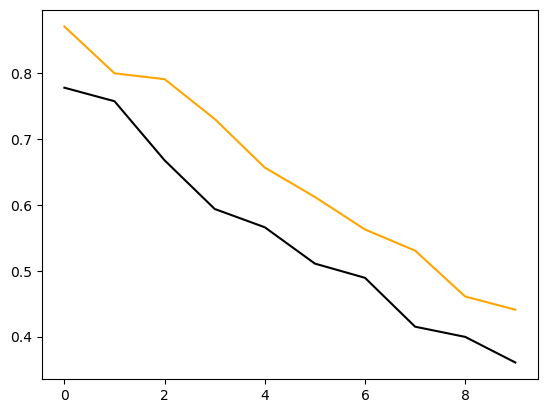

In [31]:
plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='black')

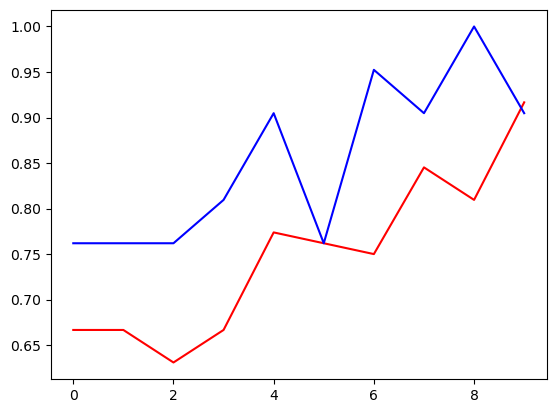

In [32]:
plt.plot(history.history['accuracy'] ,color='r')
plt.plot(history.history['val_accuracy'],color='blue')